In [34]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [36]:
folder = './march-machine-learning-mania-2024/'

Seeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
Conferences = pd.read_csv(folder+'MTeamConferences.csv')

RegularDetail = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')
TourneyCompact = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')

RegularDetail.columns.values

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [37]:
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

# Selecting Data: Winning TeamID and Score, Remove Losing Team Details

columns = ['Season', 'TeamID', 'Points', 'OppPoints', 
           'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
           'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
           'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
           'OppStl', 'OppBlk', 'OppPF']

WinTeams[columns] = RegularDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins'] = 1
WinTeams['Losses'] = 0

LoseTeams[columns] = RegularDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

def change_loc(loc):
    if loc == 'H':
        return 'A'
    elif loc == 'A':
        return 'H'
    else:
        return 'N'

LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc)

LoseTeams['Wins'] = 0
LoseTeams['Losses'] = 1

WinLoseTeams = pd.concat([WinTeams, LoseTeams])
WinLoseTeams

Season  TeamID  Points  OppPoints Loc  NumOT  FGM  FGA  FGM3  FGA3  \
0         2003    1104      68         62   N      0   27   58     3    14   
1         2003    1272      70         63   N      0   26   62     8    20   
2         2003    1266      73         61   N      0   24   58     8    18   
3         2003    1296      56         50   N      0   18   38     3     9   
4         2003    1400      77         71   N      0   30   61     6    14   
...        ...     ...     ...        ...  ..    ...  ...  ...   ...   ...   
113236    2024    1196      67         86   N      0   24   66     1    13   
113237    2024    1433      51         57   N      0   17   47     5    24   
113238    2024    1458      87         93   N      0   30   64     7    20   
113239    2024    1396      69         85   N      0   25   61     5    21   
113240    2024    1135      61         62   N      0   23   55     7    25   

        ...  OppFTA  OppOR  OppDR  OppAst  OppTO  OppStl  OppBlk  OppPF  Wins  \
0       ...      22     10     22       8     18       9       2     20     1   
1       ...      20     20     25       7     12       8       6     16     1   
2       ...      23     31     22       9     12       2       5     23     1   
3       ...      15     17     20       9     19       4       3     23     1   
4       ...      27     21     15      12     10       7       1     14     1   
...     ...     ...    ...    ...     ...    ...     ...     ...    ...   ...   
113236  ...      22      6     33      18     12       9      10     20     0   
113237  ...      21     19     23      13     13      12       2     14     0   
113238  ...      30     13     24      14      9       2       5     19     0   
113239  ...      22      9     27      19      8      13       5     13     0   
113240  ...      10     13     28      18      8       5       7     15     0   

        Losses  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
113236       1  
113237       1  
113238       1  
113239       1  
113240       1  

[226482 rows x 34 columns]

In [38]:
combinedTeams = WinLoseTeams.groupby(['Season', 'TeamID']).sum()
combinedTeams['NumGames'] = combinedTeams['Wins'] + combinedTeams['Losses']
combinedTeams.columns.values

array(['Points', 'OppPoints', 'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3',
       'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF',
       'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA',
       'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk', 'OppPF',
       'Wins', 'Losses', 'NumGames'], dtype=object)

In [39]:
RegularSeasonInput = pd.DataFrame()

RegularSeasonInput['WinRatio'] = combinedTeams['Wins'] / combinedTeams['NumGames']
RegularSeasonInput['PointsPerGame'] = combinedTeams['Points'] / combinedTeams['NumGames']
RegularSeasonInput['PointsAllowedPerGame'] = combinedTeams['OppPoints'] / combinedTeams['NumGames']
RegularSeasonInput['PointsRatio'] = combinedTeams['Points'] / combinedTeams['OppPoints']
RegularSeasonInput['OTsPerGame'] = combinedTeams['NumOT'] / combinedTeams['NumGames']


RegularSeasonInput['FGPerGame'] = combinedTeams['FGM'] / combinedTeams['NumGames']
RegularSeasonInput['FGRatio'] = combinedTeams['FGM'] / combinedTeams['FGA']
RegularSeasonInput['FGAllowedPerGame'] = combinedTeams['OppFGM'] / combinedTeams['NumGames']

RegularSeasonInput['FG3PerGame'] = combinedTeams['FGM3'] / combinedTeams['NumGames']
RegularSeasonInput['FG3Ratio'] = combinedTeams['FGM3'] / combinedTeams['FGA3']
RegularSeasonInput['FG3AllowedPerGame'] = combinedTeams['OppFGM3'] / combinedTeams['NumGames']

RegularSeasonInput['FTPerGame'] = combinedTeams['FTM'] / combinedTeams['NumGames']
RegularSeasonInput['FTRatio'] = combinedTeams['FTM'] / combinedTeams['FTA']
RegularSeasonInput['FTAllowedPerGame'] = combinedTeams['OppFTM'] / combinedTeams['NumGames']

RegularSeasonInput['ORRatio'] = combinedTeams['OR'] / combinedTeams['OppOR']
RegularSeasonInput['DRRatio'] = combinedTeams['DR'] / combinedTeams['OppDR']

RegularSeasonInput['AstPerGame'] = combinedTeams['Ast'] / combinedTeams['NumGames']

RegularSeasonInput['TOPerGame'] = combinedTeams['TO'] / combinedTeams['NumGames']
RegularSeasonInput['StlPerGame'] = combinedTeams['Stl'] / combinedTeams['NumGames']
RegularSeasonInput['BlkPerGame'] = combinedTeams['Blk'] / combinedTeams['NumGames']
RegularSeasonInput['PFPerGame'] = combinedTeams['PF'] / combinedTeams['NumGames']


RegularSeasonInput

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2024   1474    0.387097      77.322581             82.580645     0.936328   
       1475    0.172414      66.931034             74.965517     0.892824   
       1476    0.100000      63.200000             77.200000     0.818653   
       1477    0.333333      67.266667             76.600000     0.878155   
       1478    0.413793      69.965517             71.482759     0.978775   

               OTsPerGame  FGPerGame   FGRatio  FGAllowedPerGame  FG3PerGame  \
Season TeamID                                                                  
2003   1102      0.000000  19.142857  0.481149         19.285714    7.821429   
       1103      0.296296  27.148148  0.486074         27.777778    5.444444   
       1104      0.035714  24.035714  0.420362         23.250000    6.357143   
       1105      0.153846  24.384615  0.395755         27.000000    7.576923   
       1106      0.035714  23.428571  0.423773         21.714286    6.107143   
...                   ...        ...       ...               ...         ...   
2024   1474      0.000000  26.967742  0.431373         30.516129    8.419355   
       1475      0.034483  22.379310  0.398160         24.034483    6.448276   
       1476      0.033333  22.933333  0.395857         26.966667    8.200000   
       1477      0.300000  23.300000  0.392256         27.133333    8.033333   
       1478      0.034483  24.586207  0.420153         25.689655    9.482759   

               FG3Ratio  ...  FTPerGame   FTRatio  FTAllowedPerGame   ORRatio  \
Season TeamID            ...                                                    
2003   1102    0.375643  ...  11.142857  0.651357         13.678571  0.434944   
       1103    0.338710  ...  19.037037  0.736390         15.925926  0.812308   
       1104    0.320144  ...  14.857143  0.709898         12.142857  1.245902   
       1105    0.364815  ...  15.423077  0.705986         16.384615  1.023324   
       1106    0.346154  ...  10.642857  0.646421         15.535714  1.085174   
...                 ...  ...        ...       ...               ...       ...   
2024   1474    0.329962  ...  14.967742  0.710567         13.548387  0.950355   
       1475    0.316413  ...  15.724138  0.743883         19.965517  1.004082   
       1476    0.301471  ...   9.133333  0.697201         13.200000  0.703072   
       1477    0.293902  ...  12.633333  0.691606         16.200000  0.792254   
       1478    0.341191  ...  11.310345  0.764569         11.620690  0.760148   

                DRRatio  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
Season TeamID                                                            
2003   1102    0.835106   13.000000  11.428571    5.964286    1.785714   
       1103    0.904202   15.222222  12.629630    7.259259    2.333333   
       1104    1.056782   12.107143  13.285714    6.607143    3.785714   
       1105    0.876093   14.538462  18.653846    9.307692    2.076923   
       1106    1.067093   11.678571  17.035714    8.357143    3.142857   
...                 ...         ...        ...         ...         ...   
2024   1474    0.911471   12.258065  11.193548    6.645161    2.709677   
       1475    0.990127   10.862069  12.827586    6.137931    2.758621   
       1476    0.859627   11.866667  12.966667    6.266667    2.366667   
       1477    0.745721   12.266667  11.000000    7.366667    4.566667   
       1478    0.919463   14.9

In [40]:
seed_dict = Seeds.set_index(['Season', 'TeamID'])

display(seed_dict)

winIDs = TourneyCompact['WTeamID']
loseIDS = TourneyCompact['LTeamID']
season = TourneyCompact['Season']

winners = pd.DataFrame()
winners[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'WTeamID', 'LTeamID']]
winners['Result'] = 1

losers = pd.DataFrame()
losers[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'LTeamID', 'WTeamID']]
losers['Result'] = 0

TourneyInput = pd.DataFrame()
TourneyInput = pd.concat([winners, losers])

TourneyInput = TourneyInput[TourneyInput['Season']>=2003].reset_index(drop=True)

TourneyInput 

Seed
Season TeamID     
1985   1207    W01
       1210    W02
       1228    W03
       1260    W04
       1374    W05
...            ...
2024   1241    Z12
       1436    Z13
       1324    Z14
       1443    Z15
       1255    Z16

[2558 rows x 1 columns]

Season  Team1  Team2  Result
0       2003   1421   1411       1
1       2003   1112   1436       1
2       2003   1113   1272       1
3       2003   1141   1166       1
4       2003   1143   1301       1
...      ...    ...    ...     ...
2625    2023   1400   1274       0
2626    2023   1166   1361       0
2627    2023   1274   1163       0
2628    2023   1194   1361       0
2629    2023   1361   1163       0

[2630 rows x 4 columns]

In [41]:
team1seeds = []
team2seeds = []

for i in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][i], TourneyInput['Team1'][i])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team1seeds.append(seed)

    idx = (TourneyInput['Season'][i], TourneyInput['Team2'][i])
    seed = seed_dict.loc[idx].values[0]
    if len(seed) == 4:
        seed = int(seed[1:-1])
    else:
        seed = int(seed[1:])
    team2seeds.append(seed)

TourneyInput['Team1Seed'] = team1seeds
TourneyInput['Team2Seed'] = team2seeds

TourneyInput

Season  Team1  Team2  Result  Team1Seed  Team2Seed
0       2003   1421   1411       1         16         16
1       2003   1112   1436       1          1         16
2       2003   1113   1272       1         10          7
3       2003   1141   1166       1         11          6
4       2003   1143   1301       1          8          9
...      ...    ...    ...     ...        ...        ...
2625    2023   1400   1274       0          2          5
2626    2023   1166   1361       0          6          5
2627    2023   1274   1163       0          5          4
2628    2023   1194   1361       0          9          5
2629    2023   1361   1163       0          5          4

[2630 rows x 6 columns]

In [42]:
outscores = []

for x in range(len(TourneyInput)):
    idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
    team1score = RegularSeasonInput.loc[idx]
    team1score['Seed'] = TourneyInput['Team1Seed'][x]

    idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
    team2score = RegularSeasonInput.loc[idx]
    team2score['Seed'] = TourneyInput['Team2Seed'][x]

    outscore = team1score - team2score
    outscore['Result'] = TourneyInput['Result'][x]
    outscores.append(outscore)

outscores = pd.DataFrame(outscores)

outscores

/var/folders/39/wsgn0nfs4mb3w_gnxtgrj6bm0000gn/T/ipykernel_53154/309672937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/39/wsgn0nfs4mb3w_gnxtgrj6bm0000gn/T/ipykernel_53154/309672937.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1score['Seed'] = TourneyInput['Team1Seed'][x]
/var/folders/39/wsgn0nfs4mb3w_gnxtgrj6bm0000gn/T/ipykernel_53154/309672937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  OTsPerGame  \
0    -0.151724      -1.593103              7.614943    -0.120072    0.139080   
1     0.237685      17.421182              7.112069     0.139285    0.002463   
2    -0.172414       1.448276              3.344828    -0.033801    0.034483   
3    -0.085684       0.102403              8.908046    -0.148414   -0.030303   
4     0.124138       2.082759              1.758621     0.003015    0.070115   
...        ...            ...                   ...          ...         ...   
2625 -0.016544      -1.553309             -4.713235     0.053933    0.056985   
2626 -0.176136       5.292614              4.672348     0.001005   -0.001894   
2627  0.023674       0.951705              7.094697    -0.105477    0.031250   
2628  0.093750       6.812500              1.468750     0.079202    0.000000   
2629  0.054924      -7.110795             -1.217803    -0.088409    0.062500   

      FGPerGame   FGRatio  FGAllowedPerGame  FG3PerGame  FG3Ratio  ...  \
0     -0.354023 -0.018262          2.126437    0.549425  0.039433  ...   
1      5.493842  0.016969          3.598522    1.759852  0.009777  ...   
2      0.931034  0.040251          1.517241   -3.000000 -0.030989  ...   
3     -2.076280  0.005763          2.466040   -1.142111 -0.008284  ...   
4      3.011494  0.009399          1.945977   -1.552874  0.022444  ...   
...         ...       ...               ...         ...       ...  ...   
2625  -0.762868 -0.017130         -3.406250   -0.446691 -0.028713  ...   
2626   2.421402  0.025867          3.733902    2.096591  0.016005  ...   
2627   1.362689  0.025980          4.603220   -1.406250  0.010654  ...   
2628   2.812500  0.026823          0.812500    2.906250  0.028607  ...   
2629  -2.512311 -0.018417          0.478220   -2.187500 -0.013123  ...   

      FTAllowedPerGame   ORRatio   DRRatio  AstPerGame  TOPerGame  StlPerGame  \
0             3.274713 -0.208880 -0.069442   -1.165517   0.973563    0.635632   
1             0.662562 -0.194480  0.010460    3.435961   0.716749    1.602217   
2             0.758621  0.104849  0.033351   -1.068966   0.206897   -2.172414   
3             3.889237 -0.118773  0.146645   -1.197492   4.877743   -1.290491   
4            -3.503448  0.082122  0.031976    1.333333  -0.027586   -1.214943   
...                ...       ...       ...         ...        ...         ...   
2625          3.191176 -0.062040 -0.088080    0.974265   0.091912    0.715074   
2626         -2.783144 -0.276557  0.045973    2.877841   0.063447   -1.882576   
2627         -4.734848 -0.608285 -0.154842   -2.335227  -1.395833    0.798295   
2628         -0.156250 -0.068847  0.033818    1.187500   0.187500   -0.625000   
2629         -3.641098 -0.430621 -0.130972   -4.241477  -1.427083    0.579545   

      BlkPerGame  PFPerGame  Seed  Result  
0       0.766667   0.803448   0.0     1.0  
1       1.248768   1.853448 -15.0     1.0  
2      -0.827586   0.655172   3.0     1.0  
3      -0.454545   3.692790   5.0     1.0  
4      -0.273563  -1.563218  -1.0     1.0  
...          ...        ...   ...     ...  
2625    0.365809   3.211397  -3.0     0.0  
2626    0.463068  -3.348485   1.0     0.0  
2627   -1.597538  -3.714962   1.0     0.0  
2628   -1.187500  -0.656250   4.0     0.0  
2629   -1.160038  -1.621212   1.0     0.0  

[2630 rows x 23 columns]

In [43]:
corrs = round(outscores.corr(), 2)
display(np.abs(corrs['Result']))

WinRatio                0.33
PointsPerGame           0.23
PointsAllowedPerGame    0.16
PointsRatio             0.40
OTsPerGame              0.12
FGPerGame               0.26
FGRatio                 0.20
FGAllowedPerGame        0.09
FG3PerGame              0.06
FG3Ratio                0.10
FG3AllowedPerGame       0.07
FTPerGame               0.02
FTRatio                 0.05
FTAllowedPerGame        0.15
ORRatio                 0.11
DRRatio                 0.21
AstPerGame              0.20
TOPerGame               0.15
StlPerGame              0.10
BlkPerGame              0.20
PFPerGame               0.16
Seed                    0.48
Result                  1.00
Name: Result, dtype: float64

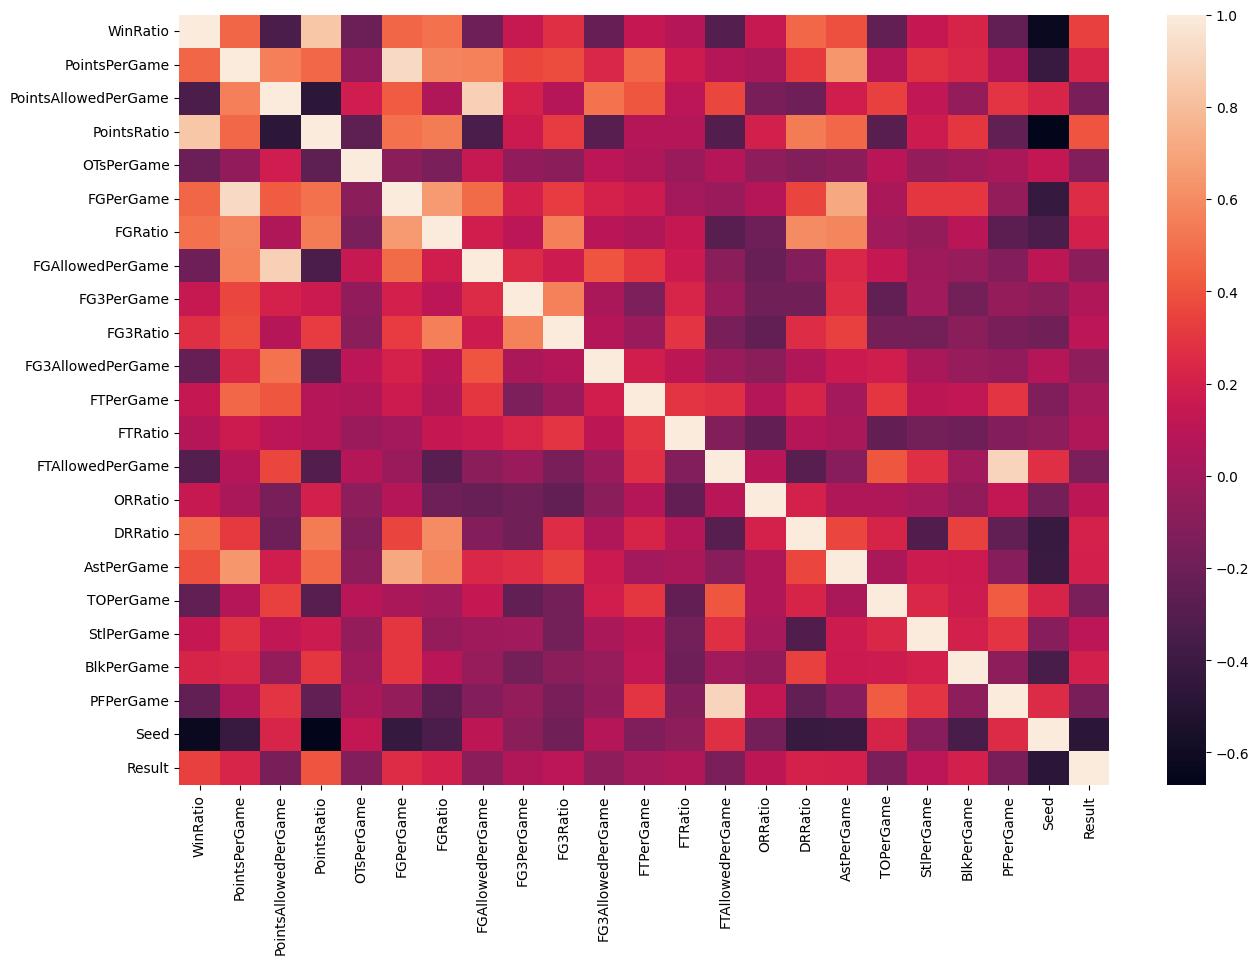

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(corrs)
plt.show()

In [45]:
X = outscores[outscores.columns[:-1]].values
y = outscores['Result'].values

np.random.seed(1)
idx = np.random.permutation(len(X))
train_idx = idx[:int(-.2*len(X))]
test_idx = idx[int(-.2*len(X)):]

X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

X_train - (X_train - mins) / (maxs - mins)
X_test - (X_test - mins) / (maxs - mins)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2104, 22) (526, 22) (2104,) (526,)


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=9, random_state=1)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7129277566539924

In [47]:
# Example Prediction

team1ID = 1177
team2ID = 1474

team1_stats = [RegularSeasonInput[column][2024][team1ID] for column in RegularSeasonInput.columns]
team1_stats.append(1)

team2_stats = [RegularSeasonInput[column][2024][team2ID] for column in RegularSeasonInput.columns]
team2_stats.append(2)


out1 = pd.DataFrame(team1_stats)
out2 = pd.DataFrame(team2_stats)

out = out1 - out2

display(out.transpose())

print(model.predict(out.transpose()))

0          1         2         3    4         5         6         7   \
0 -0.293347 -12.603831 -0.830645 -0.144661  0.0 -4.311492 -0.008385 -0.859879   

         8         9   ...        12        13        14        15        16  \
0 -2.169355  0.005046  ...  0.022883 -0.642137 -0.333113 -0.054145 -0.008065   

         17        18        19        20   21  
0  1.493952 -1.395161  0.384073 -2.389113 -1.0  

[1 rows x 22 columns]

[0.]


In [48]:
df = pd.read_csv('march-machine-learning-mania-2024/2024_tourney_seeds.csv')

def simulate_tournament_and_predict_winners(df):
    regions = df['Seed'].str[0].unique()

    for region in regions:
        print(f"--- Region: {region} ---")
        region_df = df[df['Seed'].str.startswith(region)].copy()
        region_df['SeedNo'] = region_df['Seed'].str[1:].astype(int)
        region_df.sort_values('SeedNo', inplace=True)

        round_number = 1
        while len(region_df) > 1:
            print(f"Round {round_number} winners (Region {region}):")
            next_round_teams = []

            print(len(region_df))

            max_teams = 0

            if round == 1:
                max_teams = 8
            elif round == 2:
                max_teams = 5

            for i in range(1, max_teams):
                team1_row = region_df.iloc[i - 1]
                if i <= len(region_df):
                    team2_row = region_df.iloc[16 - (i + 1)]

                    # Load team stats and seed
                    team1ID = team1_row['TeamID']
                    team2ID = team2_row['TeamID']
                    team1_stats = [RegularSeasonInput[column][2024][team1ID] for column in RegularSeasonInput.columns]
                    team1_stats.append(team1_row['SeedNo'])
                    team2_stats = [RegularSeasonInput[column][2024][team2ID] for column in RegularSeasonInput.columns]
                    team2_stats.append(team2_row['SeedNo'])

                    # Prepare input for model prediction
                    out1 = pd.DataFrame(team1_stats)
                    out2 = pd.DataFrame(team2_stats)

                    out = out1 - out2
                    prediction = model.predict(out.transpose())[0]

                    # Determine winner based on model prediction
                    winner_row = team1_row if prediction > 0 else team2_row
                    next_round_teams.append(winner_row)
                    print(f"  Seed {winner_row['Seed']}: TeamID {winner_row['TeamID']}")
                else:
                    # If odd number of teams, last team automatically moves to the next round
                    print(f"  Seed {team1_row['Seed']}: TeamID {team1_row['TeamID']}")
                    next_round_teams.append(team1_row)

            region_df = pd.DataFrame(next_round_teams).reset_index(drop=True)
            round_number += 1
        
        print(f"Region {region} Champion: Seed {region_df.iloc[0]['Seed']}, TeamID {region_df.iloc[0]['TeamID']}\n")

simulate_tournament_and_predict_winners(df)

--- Region: W ---
Round 1 winners (Region W):
16


IndexError: single positional indexer is out-of-bounds